# Retropropagación

La retropropagación (backpropagation) es el algoritmo clave utilizado para entrenar redes neuronales, ya que les permite aprender a partir de los datos. Está basada en la técnica de optimización por descenso del gradiente y funciona ajustando de manera iterativa los pesos y los sesgos de la red para minimizar el error entre las salidas predichas y las salidas reales.

En este laboratorio, crearemos una red neuronal para implementar la retropropagación en un problema XOR.

# Objetivo de este cuaderno

* Entrenar una red neuronal para resolver el problema XOR
* Implementar la retropropagación para el entrenamiento de la red neuronal
* Demostrar el uso de funciones de activación
* Comprender el proceso de aprendizaje a lo largo de múltiples épocas
* Demostrar el ajuste de pesos y sesgos mediante descenso del gradiente
* Evaluar el desempeño del modelo después del entrenamiento
* Monitorear y analizar el proceso de entrenamiento


In [4]:
# Importing the required library
import numpy as np
import matplotlib.pyplot as plt

## Inicializar las entradas
Definir las entradas y la salida esperada para el problema de la compuerta XOR


In [5]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Declarar los parámetros de la red y los pesos

Definir los parámetros de la red, tales como:
1. número de neuronas de entrada
2. neuronas en la capa oculta
3. neuronas de salida
4. tasa de aprendizaje
5. número de épocas

Además, declarar los pesos de las neuronas. Los pesos iniciales se toman como valores aleatorios, los cuales posteriormente son optimizados por el algoritmo de retropropagación dentro de la función `initialize_network_parameters()`.


In [6]:
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.1           # Learning rate
    epochs = 180000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs


## Entrenamiento de la red neuronal

La red neuronal funciona en 5 etapas:

1. **Propagación hacia adelante (Forward pass)**
    * La entrada **X** se multiplica por los pesos **w1** y se pasa a través de la primera capa, seguida de la aplicación de la función de activación sigmoide o ReLU. Esto produce la salida de la capa oculta.
    * La salida de la capa oculta se pasa luego a través del segundo conjunto de pesos **w2** para calcular la salida final. Nuevamente, se utiliza una función de activación sigmoide para generar la salida final **a2**.

2. **Cálculo del error**
    * El error se calcula como la diferencia entre la salida esperada **(d)** y la salida real **(a2)**.

3. **Propagación hacia atrás (Backward pass)**
    * **Capa de salida**: Se aplica la derivada de la función de activación sigmoide al error, produciendo el gradiente de la capa de salida **(da2)**. Este gradiente se utiliza para calcular cuánto deben ajustarse los pesos de la capa de salida.
    * **Capa oculta**: El error se propaga hacia atrás hasta la capa oculta. El gradiente en la capa oculta **(da1)** se calcula mediante el producto punto de la transpuesta de los pesos **(w2ᵀ)** y el gradiente proveniente de la capa de salida. La derivada de la función de activación (sigmoide o ReLU) se utiliza para ajustar este error.

4. **Actualización de pesos y sesgos**
    * Después de calcular los **gradientes (dz1, dz2)**, los **pesos (w1, w2)** y los **sesgos (b1, b2)** se actualizan utilizando la **tasa de aprendizaje (lr)** y los **gradientes**. Estas actualizaciones se realizan para minimizar el error y mejorar las predicciones del modelo.

5. **Entrenamiento**
    * Todo este proceso se repite durante muchas iteraciones **(épocas)**. En cada época, el modelo ajusta sus pesos y sesgos para reducir el error. Con el tiempo, la red aprende a aproximar la función XOR.

**Propagación hacia adelante:**


In [7]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.28461
Epoch: 19999, Average error: 0.26665
Epoch: 29999, Average error: 0.26211
Epoch: 39999, Average error: 0.25989
Epoch: 49999, Average error: 0.25853
Epoch: 59999, Average error: 0.25759
Epoch: 69999, Average error: 0.25689
Epoch: 79999, Average error: 0.25635
Epoch: 89999, Average error: 0.25591
Epoch: 99999, Average error: 0.25555
Epoch: 109999, Average error: 0.25525
Epoch: 119999, Average error: 0.25499
Epoch: 129999, Average error: 0.25476
Epoch: 139999, Average error: 0.25456
Epoch: 149999, Average error: 0.25438
Epoch: 159999, Average error: 0.25422
Epoch: 169999, Average error: 0.25408
Epoch: 179999, Average error: 0.25395


## Prueba de la red

Después del entrenamiento, ahora puedes probar la red neuronal para verificar que ha aprendido la función XOR y que produce valores correctos cercanos a [0, 1, 1, 0].


In [8]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

Final output after training: [[0.00832392 0.49983183 0.9927918  0.50009959]]
Ground truth [0 1 1 0]
Error after training: [[-0.00832395  0.50016817  0.00720822 -0.50009959]]
Average error: 0.25395


## Graficar el error

Aquí se grafica el error como función de las épocas. Esto muestra cómo el error cambia a lo largo de múltiples iteraciones de propagación hacia adelante y hacia atrás, y cómo la red aprende con el tiempo.


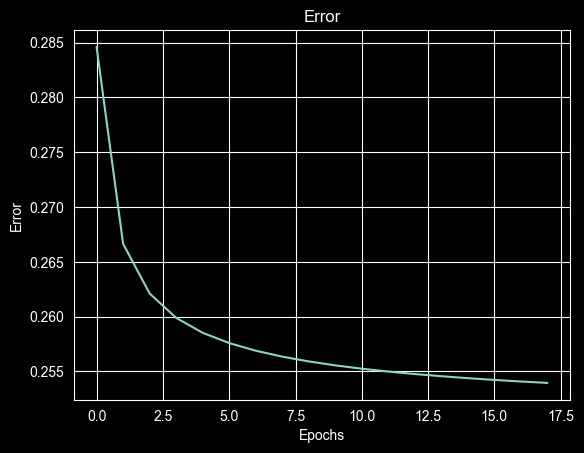

In [9]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Practica Ejercicio 1

Implementa la retropropagación para el **problema AND** utilizando entradas similares a las usadas anteriormente para el problema XOR y grafica el error.


Epoch: 9999, Average error: 0.02836
Epoch: 19999, Average error: 0.01802
Epoch: 29999, Average error: 0.01409
Epoch: 39999, Average error: 0.01190
Epoch: 49999, Average error: 0.01046
Epoch: 59999, Average error: 0.00943
Epoch: 69999, Average error: 0.00864
Epoch: 79999, Average error: 0.00802
Epoch: 89999, Average error: 0.00751
Epoch: 99999, Average error: 0.00708
Epoch: 109999, Average error: 0.00672
Epoch: 119999, Average error: 0.00640
Epoch: 129999, Average error: 0.00613
Epoch: 139999, Average error: 0.00588
Epoch: 149999, Average error: 0.00566
Epoch: 159999, Average error: 0.00547
Epoch: 169999, Average error: 0.00529
Epoch: 179999, Average error: 0.00513

Final output after training: [[2.70425991e-04 4.63881797e-03 6.11238765e-03 9.90513054e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00027043 -0.00463883 -0.00611241  0.00948697]]
Average error: 0.00513


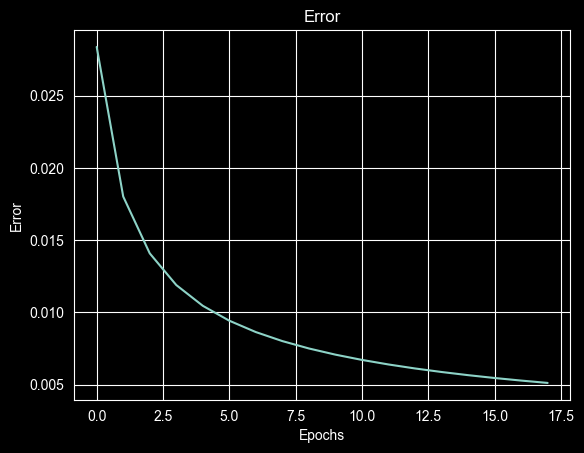

In [10]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
d = np.array([0, 0, 0, 1])

w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Practica Ejercicio 2

Ahora, reduce la tasa de aprendizaje a 0.01 y aumenta el número de épocas a 1,000,000, y verifica el error para la compuerta XOR.


Epoch: 9999, Average error: 0.24826
Epoch: 19999, Average error: 0.03997
Epoch: 29999, Average error: 0.02712
Epoch: 39999, Average error: 0.02171
Epoch: 49999, Average error: 0.01858
Epoch: 59999, Average error: 0.01648
Epoch: 69999, Average error: 0.01494
Epoch: 79999, Average error: 0.01377
Epoch: 89999, Average error: 0.01282
Epoch: 99999, Average error: 0.01205
Epoch: 109999, Average error: 0.01140
Epoch: 119999, Average error: 0.01084
Epoch: 129999, Average error: 0.01036
Epoch: 139999, Average error: 0.00993
Epoch: 149999, Average error: 0.00955
Epoch: 159999, Average error: 0.00921
Epoch: 169999, Average error: 0.00891
Epoch: 179999, Average error: 0.00863

Final output after training: [[0.00794349 0.99176048 0.99176065 0.01009521]]
Ground truth [0 1 1 0]
Error after training: [[-0.00794351  0.00823954  0.00823937 -0.01009524]]
Average error: 0.00863


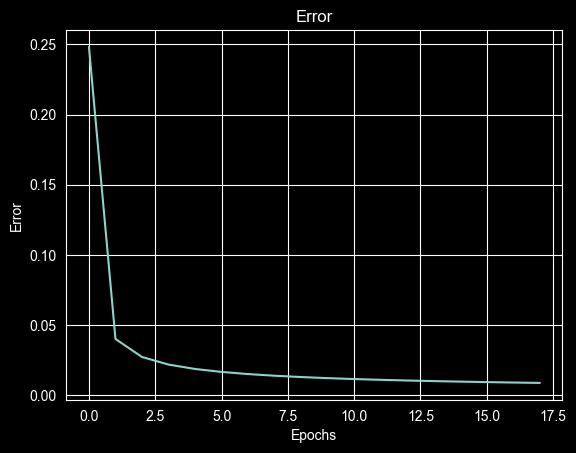

In [11]:
lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()